# Importing packages

In [ ]:
#install.packages("here")
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
source(here('Modules','data_cleaning.R'))
source(here('Modules','unsupervised_learning.R'))
#install_all_packages()
load_library_packages()

# Decision Trees and Random Fortest

## Output variable: Practice of exercise During

In [177]:
dim(pa_dataset)

[1] 1241   74

In [145]:
table(pa_dataset[, "PA_practice_during"])


dont_practice      practice 
          345           896 

There is a majority class, we should apply data augmentation. We chose kappa metrict to optimize becouse data is unbalanced.

### Creating the dataset partition

In [146]:
set.seed(2)
lista_treino <- createDataPartition(pa_dataset$PA_practice_during, p=0.7, list=FALSE)
treino <- pa_dataset[lista_treino,]
teste <- pa_dataset[-lista_treino,]

### Applying augmentation into the training set

In [147]:
treino.aug <- data_augmentation(
    train_data=treino,
    yname="PA_practice_during",
    maj_class = "practice",
    min_classes = c("dont_practice"),
    ycol=match("PA_practice_during",names(pa_dataset))
)

table(treino.aug[, "PA_practice_during"])


[1] "entrei"



dont_practice      practice 
          628           628 

### Decision Tree: Kappa metric without augmentation

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            34       44
  practice                 69      224
                                          
               Accuracy : 0.6954          
                 95% CI : (0.6458, 0.7419)
    No Information Rate : 0.7224          
    P-Value [Acc > NIR] : 0.88753         
                                          
                  Kappa : 0.1793          
                                          
 Mcnemar's Test P-Value : 0.02396         
                                          
            Sensitivity : 0.33010         
            Specificity : 0.83582         
         Pos Pred Value : 0.43590         
         Neg Pred Value : 0.76451         
             Prevalence : 0.27763         
         Detection Rate : 0.09164         
   Detection Prevalence : 0.21024         
      Balanced Accuracy : 0.58296         
                                          
       '

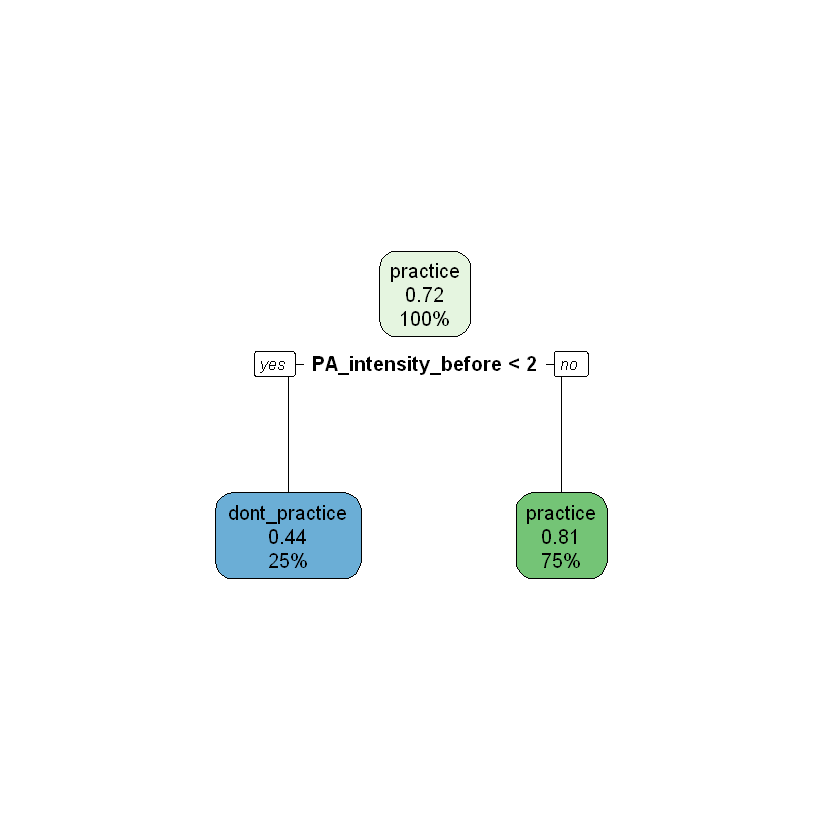

In [148]:
set.seed(2)
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = treino,
    test_data=teste,
    yname="PA_practice_during",
    length = 3
)
print(model$matrix)
# print(model$result)
rpart.plot(model$result$finalModel)



### Decision Tree: Kappa metric with augmentation

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            46       66
  practice                 57      202
                                         
               Accuracy : 0.6685         
                 95% CI : (0.618, 0.7162)
    No Information Rate : 0.7224         
    P-Value [Acc > NIR] : 0.9904         
                                         
                  Kappa : 0.1951         
                                         
 Mcnemar's Test P-Value : 0.4707         
                                         
            Sensitivity : 0.4466         
            Specificity : 0.7537         
         Pos Pred Value : 0.4107         
         Neg Pred Value : 0.7799         
             Prevalence : 0.2776         
         Detection Rate : 0.1240         
   Detection Prevalence : 0.3019         
      Balanced Accuracy : 0.6002         
                                         
       'Positive' Class : d

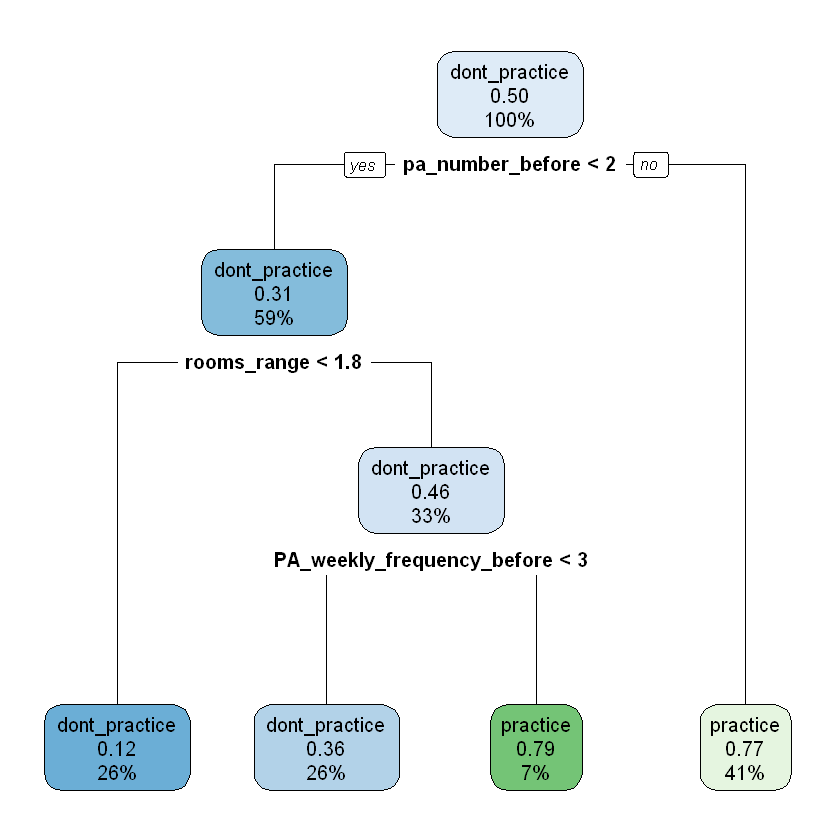

In [149]:
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = treino.aug,
    test_data=teste,
    yname="PA_practice_during",
    length=3
)
print(model$matrix)
rpart.plot(model$result$finalModel)

### RF: Kappa metric without augmentation

In [150]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = treino,
    test_data=teste,
    yname="PA_practice_during",
    length = 3
)
print(model$matrix)

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            35       31
  practice                 68      237
                                          
               Accuracy : 0.7332          
                 95% CI : (0.6851, 0.7775)
    No Information Rate : 0.7224          
    P-Value [Acc > NIR] : 0.3451409       
                                          
                  Kappa : 0.252           
                                          
 Mcnemar's Test P-Value : 0.0002967       
                                          
            Sensitivity : 0.33981         
            Specificity : 0.88433         
         Pos Pred Value : 0.53030         
         Neg Pred Value : 0.77705         
             Prevalence : 0.27763         
         Detection Rate : 0.09434         
   Detection Prevalence : 0.17790         
      Balanced Accuracy : 0.61207         
                                          
       '

rf variable importance

  only 20 most important variables shown (out of 79)

                                     Overall
PA_intensity_before                   100.00
age_range                              44.95
PA_duration_before                     38.61
PA_weekly_frequency_before             37.71
income_range                           33.87
pa_number_before                       29.42
scholarity                             29.01
rooms_range                            28.04
PA_easiness_before1                    27.50
co.resident_range                      21.61
PA_easiness_collective_before1         17.78
anxious_before1                        15.60
happy_before1                          14.40
hopeful_before1                        14.34
optimistic_before1                     14.05
PA_easiness_others_before1             13.62
PA_barriers_before_time_convenience1   13.13
martialStatus2                         12.76
Health_professional1                   12.67
hiking_before1        

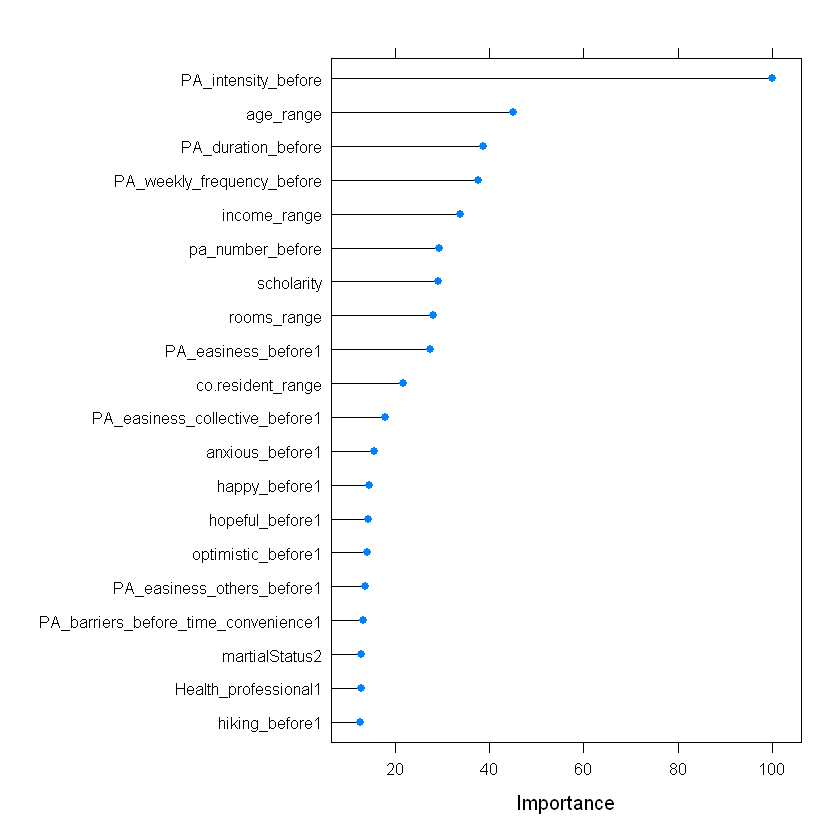

In [151]:
plot(varImp(model$result), top=20)
varImp(model$result)


### RF: Kappa metric with augmentation

In [152]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = treino.aug,
    test_data=teste,
    yname="PA_practice_during",
    length = 3
)
print(model$matrix)

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            36       29
  practice                 67      239
                                          
               Accuracy : 0.7412          
                 95% CI : (0.6935, 0.7851)
    No Information Rate : 0.7224          
    P-Value [Acc > NIR] : 0.2266945       
                                          
                  Kappa : 0.2722          
                                          
 Mcnemar's Test P-Value : 0.0001592       
                                          
            Sensitivity : 0.34951         
            Specificity : 0.89179         
         Pos Pred Value : 0.55385         
         Neg Pred Value : 0.78105         
             Prevalence : 0.27763         
         Detection Rate : 0.09704         
   Detection Prevalence : 0.17520         
      Balanced Accuracy : 0.62065         
                                          
       '

rf variable importance

  only 20 most important variables shown (out of 79)

                                    Overall
pa_number_before                    100.000
co.resident_range                    84.271
PA_intensity_before                  61.342
rooms_range                          46.342
age_range                            41.306
muscle_training_before1              23.580
PA_weekly_frequency_before           22.459
income_range                         21.452
scholarity                           15.893
PA_duration_before                   14.911
PA_easiness_before1                  11.320
PA_easiness_collective_before1        9.295
happy_before1                         8.547
PA_easiness_home_equipament_before1   8.100
PA_barriers_before_none1              7.597
optimistic_before1                    7.590
anxious_before1                       7.321
running_before1                       7.315
hopeful_before1                       7.075
martialStatus2                        6.80

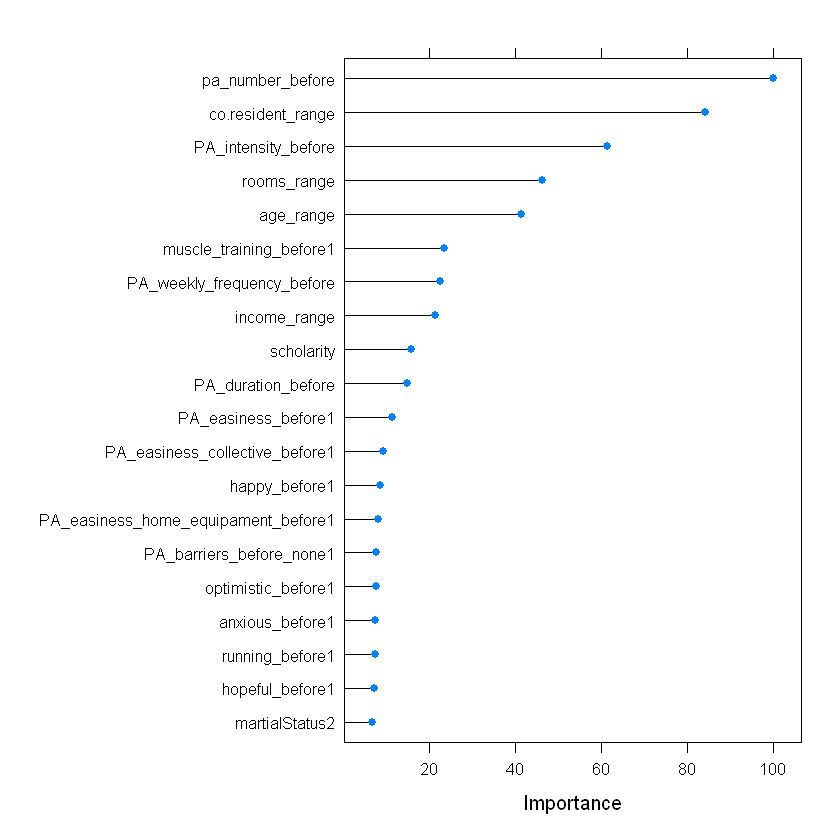

In [153]:
plot(varImp(model$result), top=20)
varImp(model$result)


## Output variable: sedentary time range

In [154]:
table(sedentary_dataset[, "sedentary_time_range_during"])


   8_hour_or_more less_then_8_hours 
              437               805 

### Creating dataset partition

In [155]:
set.seed(2)
lista_treino <- createDataPartition(sedentary_dataset$sedentary_time_range_during, p=0.7, list=FALSE)
treino <- sedentary_dataset[lista_treino,]
teste <- sedentary_dataset[-lista_treino,]

### Applying augmentation into the training set

In [156]:
treino.aug <- data_augmentation(
    train_data=treino,
    yname="sedentary_time_range_during",
    maj_class = "less_then_8_hours",
    min_classes = c("8_hour_or_more"),
    ycol=match("sedentary_time_range_during",names(sedentary_dataset))
)

table(treino.aug[, "sedentary_time_range_during"])


[1] "entrei"



   8_hour_or_more less_then_8_hours 
              564               564 

### Kappa metric without augmentation

Confusion Matrix and Statistics

                   Reference
Prediction          8_hour_or_more less_then_8_hours
  8_hour_or_more                40                14
  less_then_8_hours             91               227
                                         
               Accuracy : 0.7177         
                 95% CI : (0.669, 0.7629)
    No Information Rate : 0.6478         
    P-Value [Acc > NIR] : 0.002479       
                                         
                  Kappa : 0.2856         
                                         
 Mcnemar's Test P-Value : 1.199e-13      
                                         
            Sensitivity : 0.3053         
            Specificity : 0.9419         
         Pos Pred Value : 0.7407         
         Neg Pred Value : 0.7138         
             Prevalence : 0.3522         
         Detection Rate : 0.1075         
   Detection Prevalence : 0.1452         
      Balanced Accuracy : 0.6236         
                       

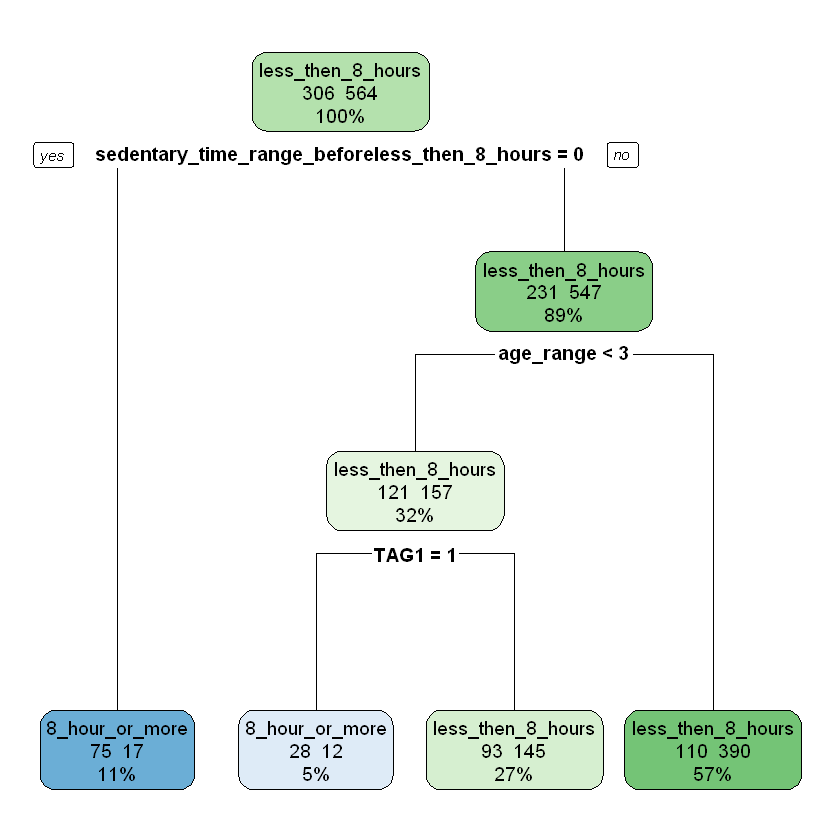

In [157]:
set.seed(2)
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = treino,
    test_data=teste,
    yname="sedentary_time_range_during",
    length = 3
)
print(model$matrix)
# print(model$result)
rpart.plot(model$result$finalModel, extra=101)



### Kappa metric with augmentation

Confusion Matrix and Statistics

                   Reference
Prediction          8_hour_or_more less_then_8_hours
  8_hour_or_more                59                31
  less_then_8_hours             72               210
                                         
               Accuracy : 0.7231         
                 95% CI : (0.6746, 0.768)
    No Information Rate : 0.6478         
    P-Value [Acc > NIR] : 0.001201       
                                         
                  Kappa : 0.3465         
                                         
 Mcnemar's Test P-Value : 8.104e-05      
                                         
            Sensitivity : 0.4504         
            Specificity : 0.8714         
         Pos Pred Value : 0.6556         
         Neg Pred Value : 0.7447         
             Prevalence : 0.3522         
         Detection Rate : 0.1586         
   Detection Prevalence : 0.2419         
      Balanced Accuracy : 0.6609         
                       

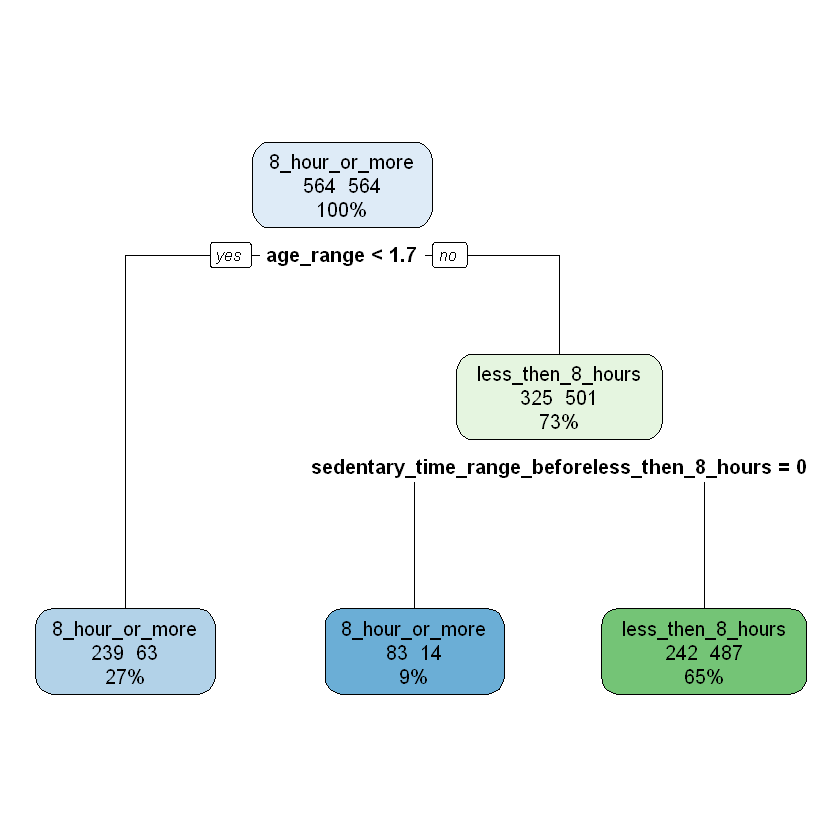

In [158]:
set.seed(2)
model <- fit_model(
    model_method="rpart",
    model_metric="Accuracy",
    trControl_func = trainControl(method = "cv"),
    train_data = treino.aug,
    test_data=teste,
    yname="sedentary_time_range_during",
    length = 3
)
print(model$matrix)
# print(model$result)
rpart.plot(model$result$finalModel, extra=101)



### RF: Kappa metric without augmentation

In [159]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = treino,
    test_data=teste,
    yname="sedentary_time_range_during",
    length = 3
)
print(model$matrix)

Confusion Matrix and Statistics

                   Reference
Prediction          8_hour_or_more less_then_8_hours
  8_hour_or_more                58                26
  less_then_8_hours             73               215
                                          
               Accuracy : 0.7339          
                 95% CI : (0.6859, 0.7781)
    No Information Rate : 0.6478          
    P-Value [Acc > NIR] : 0.0002426       
                                          
                  Kappa : 0.3647          
                                          
 Mcnemar's Test P-Value : 3.779e-06       
                                          
            Sensitivity : 0.4427          
            Specificity : 0.8921          
         Pos Pred Value : 0.6905          
         Neg Pred Value : 0.7465          
             Prevalence : 0.3522          
         Detection Rate : 0.1559          
   Detection Prevalence : 0.2258          
      Balanced Accuracy : 0.6674          
     

rf variable importance

  only 20 most important variables shown (out of 79)

                                             Overall
sedentary_time_range_beforeless_then_8_hours  100.00
age_range                                      72.97
income_range                                   34.12
pa_number_before                               33.53
rooms_range                                    31.91
PA_duration_before                             29.03
scholarity                                     29.02
PA_intensity_before                            26.13
co.resident_range                              22.61
PA_weekly_frequency_before                     21.02
martialStatus2                                 16.99
PA_easiness_before1                            16.87
happy_before1                                  16.36
sex2                                           15.36
hopeful_before1                                15.31
PA_easiness_professional_guidance_before1      15.10
optimistic_before1   

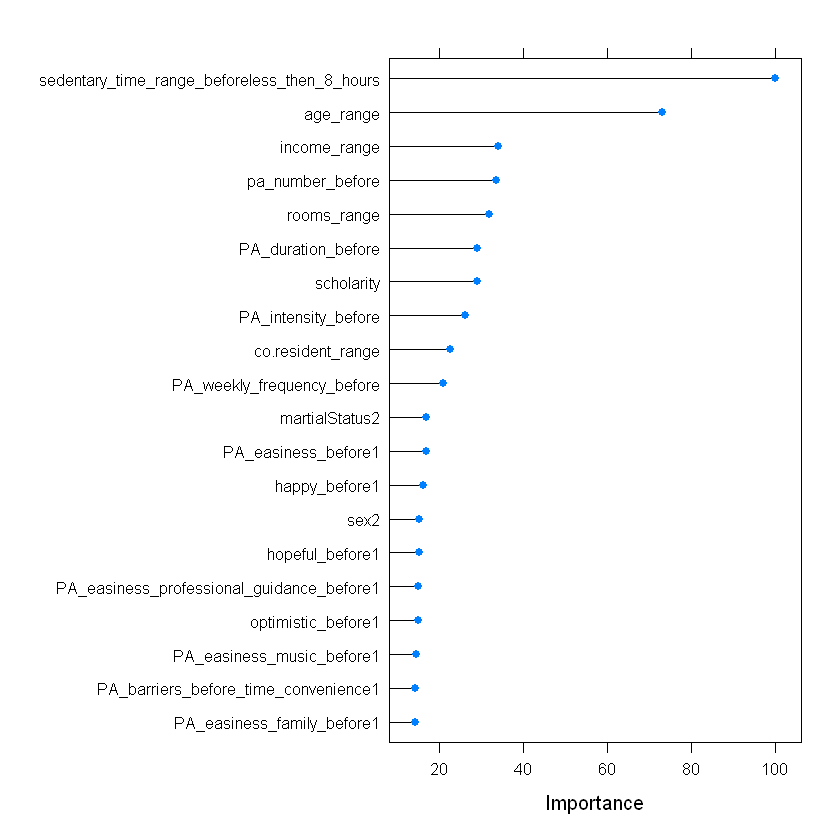

In [160]:
plot(varImp(model$result), top=20)
varImp(model$result)


### RF: Kappa metric with augmentation

In [161]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = treino.aug,
    test_data=teste,
    yname="sedentary_time_range_during",
    length = 3
)
print(model$matrix)

Confusion Matrix and Statistics

                   Reference
Prediction          8_hour_or_more less_then_8_hours
  8_hour_or_more                62                23
  less_then_8_hours             69               218
                                          
               Accuracy : 0.7527          
                 95% CI : (0.7056, 0.7957)
    No Information Rate : 0.6478          
    P-Value [Acc > NIR] : 8.892e-06       
                                          
                  Kappa : 0.4108          
                                          
 Mcnemar's Test P-Value : 2.711e-06       
                                          
            Sensitivity : 0.4733          
            Specificity : 0.9046          
         Pos Pred Value : 0.7294          
         Neg Pred Value : 0.7596          
             Prevalence : 0.3522          
         Detection Rate : 0.1667          
   Detection Prevalence : 0.2285          
      Balanced Accuracy : 0.6889          
     

rf variable importance

  only 20 most important variables shown (out of 79)

                                             Overall
age_range                                    100.000
sedentary_time_range_beforeless_then_8_hours  73.045
rooms_range                                   59.514
co.resident_range                             46.899
income_range                                  25.701
pa_number_before                              21.448
PA_duration_before                            19.177
scholarity                                    18.543
PA_intensity_before                           16.068
TAG1                                          15.834
PA_weekly_frequency_before                    15.045
depression_anxiety2                           14.829
PA_easiness_before1                           12.610
PA_barriers_before_time_convenience1          11.298
martialStatus2                                10.934
happy_before1                                 10.561
running_before1      

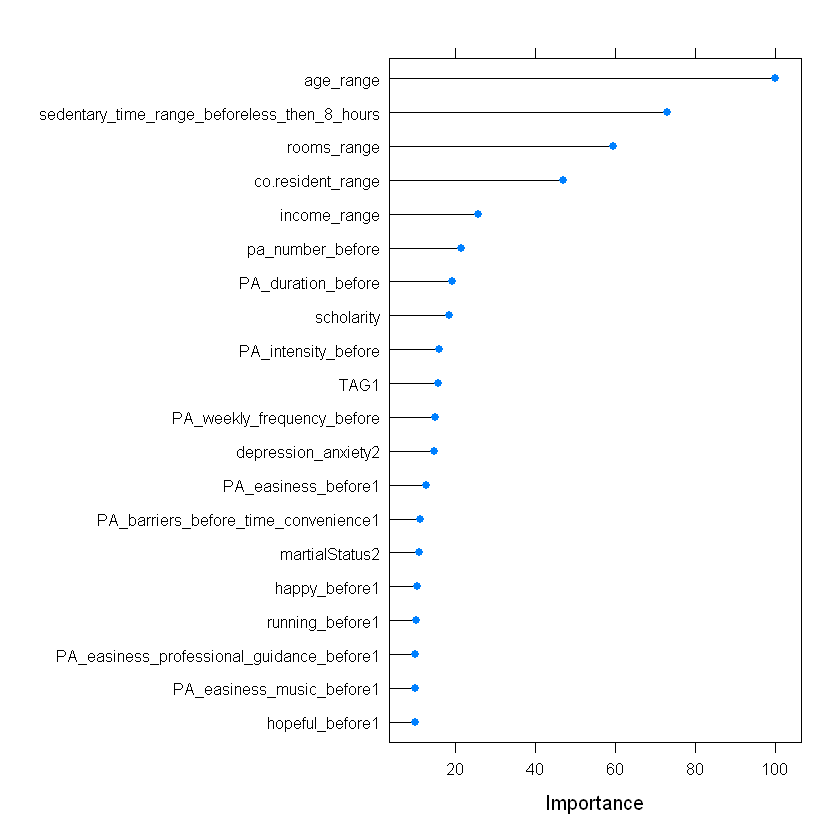

In [162]:
plot(varImp(model$result), top=20)
varImp(model$result)


## Output variable: Practice of exercise behavior

In [163]:
dim(pa_behavior_dataset)

[1] 1235   73

In [164]:
table(pa_behavior_dataset[, "pa_behavior"])
practice_before <- c("change_to_dont_practice", "still_practice")
dont_practice_before <- c("change_to_practice", "still_dont_practice")
pa_behavior_dataset_1 <- pa_behavior_dataset[pa_behavior_dataset$pa_behavior %in% practice_before, ]
pa_behavior_dataset_2 <- pa_behavior_dataset[pa_behavior_dataset$pa_behavior %in% dont_practice_before, ]


new_levels <- droplevels(pa_behavior_dataset_1[, "pa_behavior"], exclude = levels(pa_behavior_dataset_1[, "pa_behavior"]) %in% dont_practice_before)
pa_behavior_dataset_1[, "pa_behavior"] <- new_levels

new_levels <- droplevels(pa_behavior_dataset_2[, "pa_behavior"], exclude = levels(pa_behavior_dataset_1[, "pa_behavior"]) %in% practice_before)
pa_behavior_dataset_2[, "pa_behavior"] <- new_levels
table(pa_behavior_dataset_1[, "pa_behavior"])
table(pa_behavior_dataset_2[, "pa_behavior"])



change_to_dont_practice      change_to_practice     still_dont_practice 
                    270                      67                      72 
         still_practice 
                    826 


change_to_dont_practice          still_practice 
                    270                     826 


 change_to_practice still_dont_practice 
                 67                  72 

There is a majority class, we should apply data augmentation. We chose kappa metrict to optimize becouse data is unbalanced.

### Creating the dataset partition: practice before

In [165]:
set.seed(2)
lista_treino <- createDataPartition(pa_behavior_dataset_1$pa_behavior, p=0.7, list=FALSE)
treino <- pa_behavior_dataset_1[lista_treino,]
teste <- pa_behavior_dataset_1[-lista_treino,]

### Applying augmentation into the training set: practice before

In [166]:
treino.aug <- data_augmentation(
    train_data=treino,
    yname="pa_behavior",
    maj_class = "still_practice",
    min_classes = c("change_to_dont_practice"),
    ycol=match("pa_behavior",names(pa_behavior_dataset_1))
)

table(treino.aug[, "pa_behavior"])


[1] "entrei"



change_to_dont_practice          still_practice 
                    579                     579 

### Kappa metric without augmentation: practice before

Confusion Matrix and Statistics

                         Reference
Prediction                change_to_dont_practice still_practice
  change_to_dont_practice                      12              6
  still_practice                               69            241
                                                 
               Accuracy : 0.7713                 
                 95% CI : (0.722, 0.8157)        
    No Information Rate : 0.753                  
    P-Value [Acc > NIR] : 0.2424                 
                                                 
                  Kappa : 0.1677                 
                                                 
 Mcnemar's Test P-Value : 8.118e-13              
                                                 
            Sensitivity : 0.14815                
            Specificity : 0.97571                
         Pos Pred Value : 0.66667                
         Neg Pred Value : 0.77742                
             Prevalence : 0.24695    

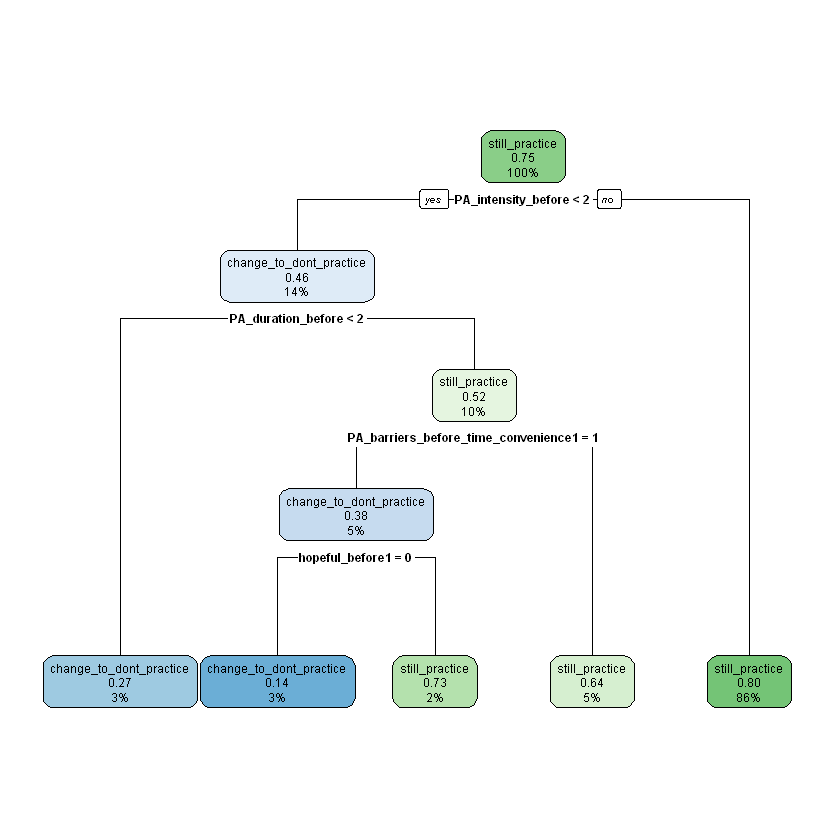

In [167]:
set.seed(2)
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = treino,
    test_data=teste,
    yname="pa_behavior",
    length = 3
)
print(model$matrix)
# print(model$result)
rpart.plot(model$result$finalModel)



### Kappa metric with augmentation: practice before

Confusion Matrix and Statistics

                         Reference
Prediction                change_to_dont_practice still_practice
  change_to_dont_practice                      46             80
  still_practice                               35            167
                                                 
               Accuracy : 0.6494                 
                 95% CI : (0.5951, 0.701)        
    No Information Rate : 0.753                  
    P-Value [Acc > NIR] : 1                      
                                                 
                  Kappa : 0.2056                 
                                                 
 Mcnemar's Test P-Value : 4.078e-05              
                                                 
            Sensitivity : 0.5679                 
            Specificity : 0.6761                 
         Pos Pred Value : 0.3651                 
         Neg Pred Value : 0.8267                 
             Prevalence : 0.2470     

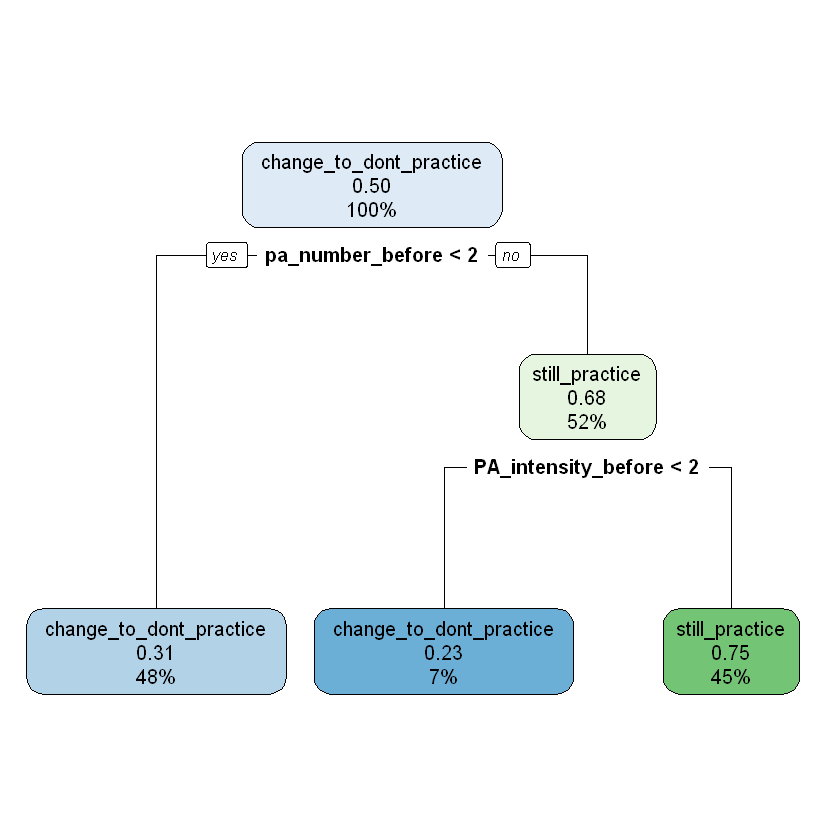

In [168]:
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = treino.aug,
    test_data=teste,
    yname="pa_behavior",
    length=3
)
print(model$matrix)
rpart.plot(model$result$finalModel)

### RF practice before: Kappa metric without augmentation

In [169]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = treino,
    test_data=teste,
    yname="pa_behavior",
    length = 3
)
print(model$matrix)

Confusion Matrix and Statistics

                         Reference
Prediction                change_to_dont_practice still_practice
  change_to_dont_practice                      26             17
  still_practice                               55            230
                                                 
               Accuracy : 0.7805                 
                 95% CI : (0.7317, 0.8241)       
    No Information Rate : 0.753                  
    P-Value [Acc > NIR] : 0.1377                 
                                                 
                  Kappa : 0.2994                 
                                                 
 Mcnemar's Test P-Value : 1.298e-05              
                                                 
            Sensitivity : 0.32099                
            Specificity : 0.93117                
         Pos Pred Value : 0.60465                
         Neg Pred Value : 0.80702                
             Prevalence : 0.24695    

rf variable importance

  only 20 most important variables shown (out of 78)

                                     Overall
PA_intensity_before                   100.00
income_range                           66.76
age_range                              64.65
pa_number_before                       51.79
PA_duration_before                     49.37
PA_weekly_frequency_before             45.99
rooms_range                            41.51
scholarity                             39.45
PA_easiness_before1                    32.49
co.resident_range                      27.92
PA_easiness_music_before1              27.09
PA_barriers_before_none1               26.57
hopeful_before1                        24.69
PA_easiness_collective_before1         24.32
anxious_before1                        22.23
optimistic_before1                     21.60
PA_barriers_before_time_convenience1   19.74
happy_before1                          19.68
hiking_before1                         19.22
Health_professional1  

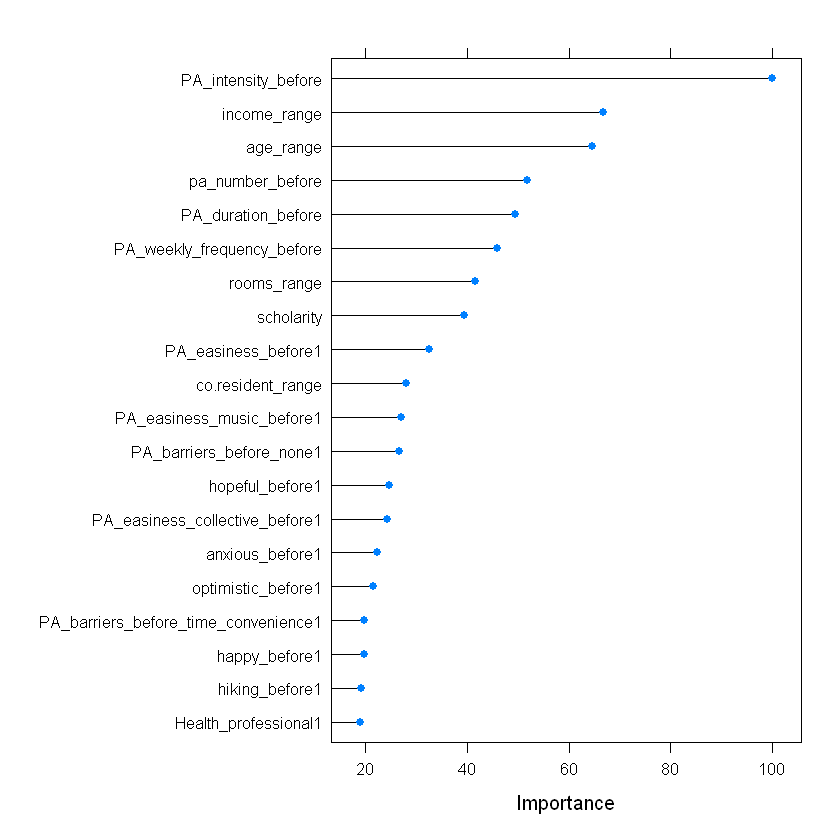

In [170]:
plot(varImp(model$result), top=20)
varImp(model$result)


### RF practice before: Kappa metric with augmentation

In [171]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = treino.aug,
    test_data=teste,
    yname="pa_behavior",
    length = 3
)
print(model$matrix)

Confusion Matrix and Statistics

                         Reference
Prediction                change_to_dont_practice still_practice
  change_to_dont_practice                      25             18
  still_practice                               56            229
                                                 
               Accuracy : 0.7744                 
                 95% CI : (0.7253, 0.8185)       
    No Information Rate : 0.753                  
    P-Value [Acc > NIR] : 0.2036                 
                                                 
                  Kappa : 0.2799                 
                                                 
 Mcnemar's Test P-Value : 1.699e-05              
                                                 
            Sensitivity : 0.30864                
            Specificity : 0.92713                
         Pos Pred Value : 0.58140                
         Neg Pred Value : 0.80351                
             Prevalence : 0.24695    

rf variable importance

  only 20 most important variables shown (out of 78)

                                     Overall
co.resident_range                     100.00
age_range                              88.60
pa_number_before                       87.97
rooms_range                            84.26
PA_intensity_before                    62.78
PA_weekly_frequency_before             41.00
income_range                           40.45
scholarity                             24.33
PA_duration_before                     21.12
PA_easiness_before1                    19.37
PA_barriers_before_none1               19.33
PA_easiness_music_before1              17.00
anxious_before1                        12.94
muscle_training_before1                12.67
running_before1                        11.85
optimistic_before1                     11.73
martialStatus2                         11.37
hopeful_before1                        11.31
hiking_before1                         11.20
PA_barriers_before_tim

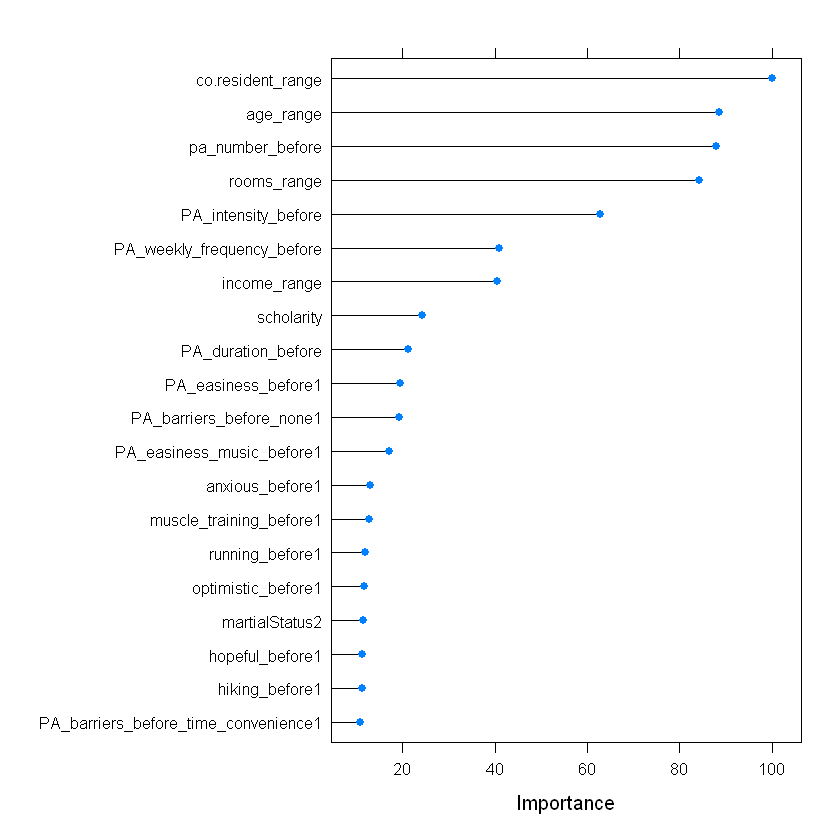

In [172]:
plot(varImp(model$result), top=20)
varImp(model$result)


### Creating the dataset partition: dont practice before

In [173]:
set.seed(2)
lista_treino <- createDataPartition(pa_behavior_dataset_2$pa_behavior, p=0.7, list=FALSE)
treino <- pa_behavior_dataset_2[lista_treino,]
teste <- pa_behavior_dataset_2[-lista_treino,]

### Accuracy metric without augmentation: dont practice before

Confusion Matrix and Statistics

                     Reference
Prediction            change_to_practice still_dont_practice
  change_to_practice                  15                  15
  still_dont_practice                  5                   6
                                            
               Accuracy : 0.5122            
                 95% CI : (0.3513, 0.6712)  
    No Information Rate : 0.5122            
    P-Value [Acc > NIR] : 0.56244           
                                            
                  Kappa : 0.0353            
                                            
 Mcnemar's Test P-Value : 0.04417           
                                            
            Sensitivity : 0.7500            
            Specificity : 0.2857            
         Pos Pred Value : 0.5000            
         Neg Pred Value : 0.5455            
             Prevalence : 0.4878            
         Detection Rate : 0.3659            
   Detection Prevalence : 0.7317 

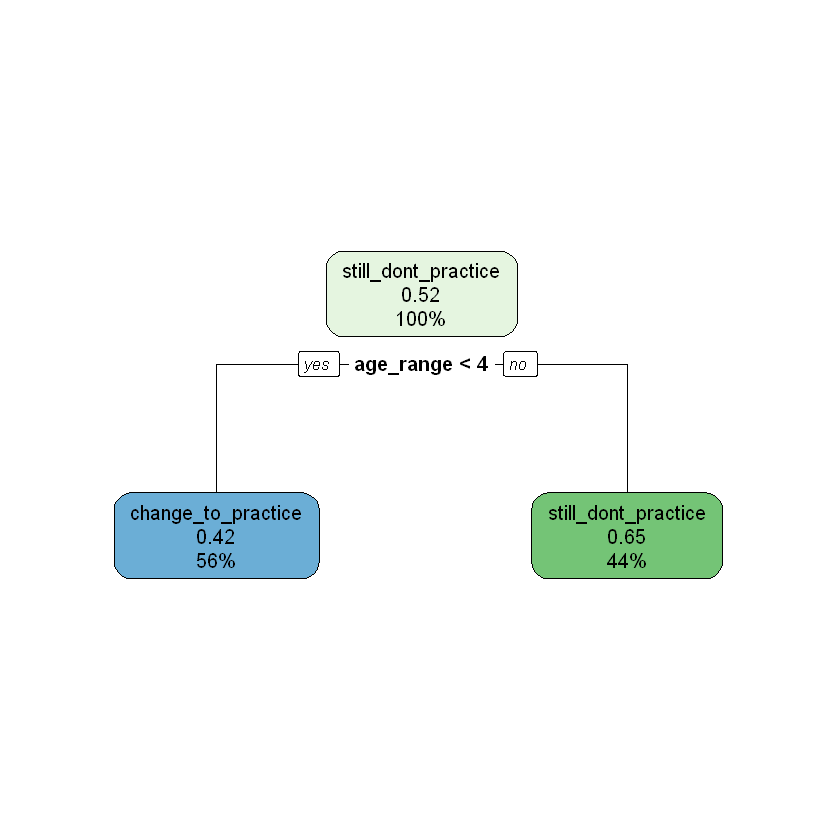

In [174]:
set.seed(2)
model <- fit_model(
    model_method="rpart",
    model_metric="Accuracy",
    trControl_func = trainControl(method = "cv"),
    train_data = treino,
    test_data=teste,
    yname="pa_behavior",
    length = 3
)
print(model$matrix)
# print(model$result)
rpart.plot(model$result$finalModel)



### RF dont practice before: Accuracy metric without augmentation

In [175]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="Accuracy",
    trControl_func = trainControl(method = "cv", search="grid"),
    train_data = treino,
    test_data=teste,
    yname="pa_behavior",
    length = 3
)
print(model$matrix)

Confusion Matrix and Statistics

                     Reference
Prediction            change_to_practice still_dont_practice
  change_to_practice                  11                   8
  still_dont_practice                  9                  13
                                            
               Accuracy : 0.5854            
                 95% CI : (0.4211, 0.7368)  
    No Information Rate : 0.5122            
    P-Value [Acc > NIR] : 0.2177            
                                            
                  Kappa : 0.1692            
                                            
 Mcnemar's Test P-Value : 1.0000            
                                            
            Sensitivity : 0.5500            
            Specificity : 0.6190            
         Pos Pred Value : 0.5789            
         Neg Pred Value : 0.5909            
             Prevalence : 0.4878            
         Detection Rate : 0.2683            
   Detection Prevalence : 0.4634 

rf variable importance

  only 20 most important variables shown (out of 78)

                                                 Overall
age_range                                         100.00
hypertension1                                      49.24
rooms_range                                        48.50
scholarity                                         44.61
co.resident_range                                  41.77
hopeless_before1                                   39.46
PA_easiness_music_before1                          36.10
income_range                                       35.33
PA_easiness_before1                                33.48
dyslipidemia1                                      29.67
PA_barriers_before_location_distance1              25.46
PA_easiness_unguided_before1                       23.02
PA_barriers_before_time_convenience1               22.68
PA_barriers_before_none1                           22.55
PA_easiness_home_equipament_before1                22.48
optimistic

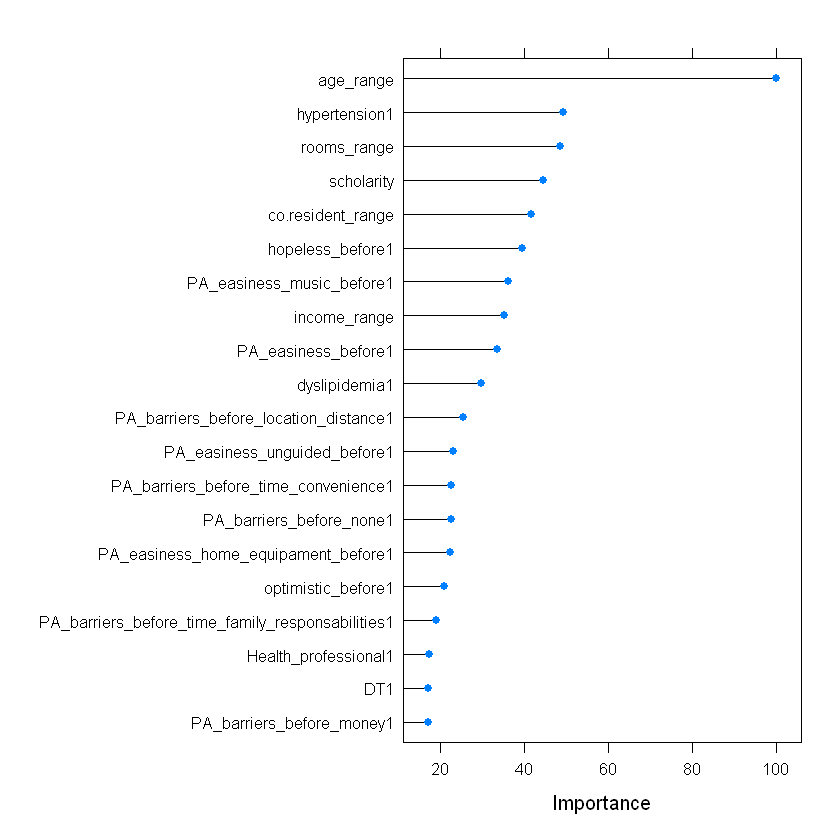

In [176]:
plot(varImp(model$result), top=20)
varImp(model$result)
